In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#for making plots more appealing
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
5,A & N Islands,2001,Causes,Family Problems,Female,0-14,0
6,A & N Islands,2001,Causes,Ideological Causes/Hero Worshipping,Female,0-14,0
7,A & N Islands,2001,Causes,Other Prolonged Illness,Female,0-14,0
8,A & N Islands,2001,Causes,Property Dispute,Female,0-14,0
9,A & N Islands,2001,Causes,Fall in Social Reputation,Female,0-14,0


In [4]:
df.shape
print('Number of Rows: ' + str(df.shape[0]) + '\nNumber of Columns: ' + str(df.shape[1]))

Number of Rows: 237519
Number of Columns: 7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [6]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


In [7]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [8]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [9]:
df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [10]:
df.State.value_counts()

State
Maharashtra          6792
Madhya Pradesh       6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Tamil Nadu           6786
Gujarat              6786
Assam                6786
Jharkhand            6785
Delhi (Ut)           6782
Tripura              6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (Uts)           312
Total (All India)     312
Total (States)        312
Name: 

In [11]:
df = df.query('State != ("Total (All India)","Total (States)", "Total (Uts)")')
df.shape

(236583, 7)

In [12]:
df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [13]:
df = df.query('Total != 0')
df.shape

(101110, 7)

In [14]:
df.Total.value_counts()


Total
1       16038
2        9939
3        6697
4        5110
5        4173
        ...  
1580        1
4265        1
1172        1
3927        1
1056        1
Name: count, Length: 1763, dtype: int64

Data Analysis

In [15]:
df.Type_code.value_counts()

Type_code
Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         5602
Social_Status            3349
Name: count, dtype: int64

Variation of No. of suicides over the years

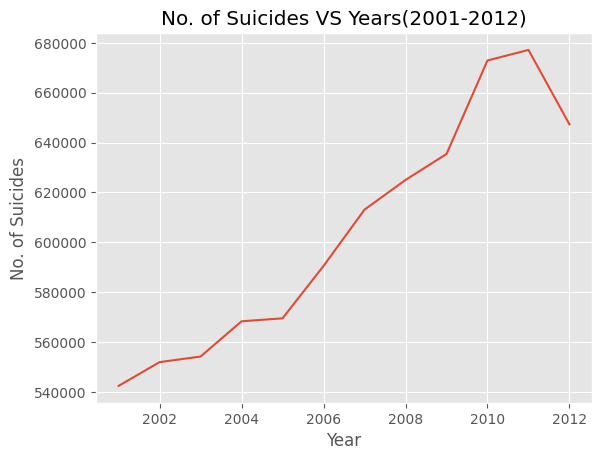

In [16]:
ax = df.groupby('Year')['Total'].sum().plot(title = 'No. of Suicides VS Years(2001-2012)')
ax.set_xlabel('Year')
ax.set_ylabel('No. of Suicides')
plt.show()

Suicides among Males and Females (2001-2012)

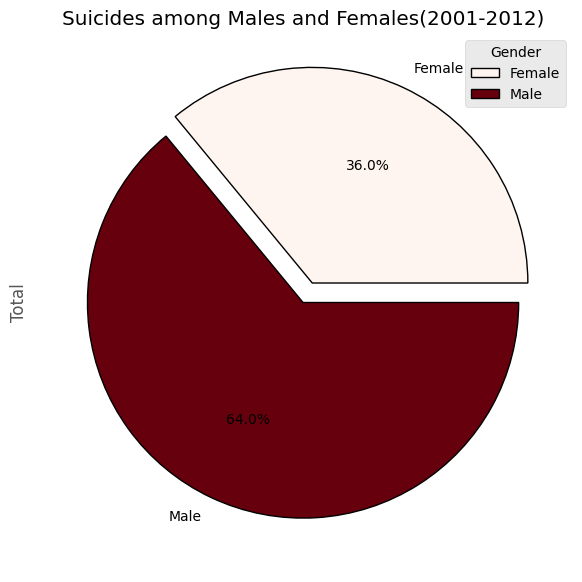

In [17]:
ax = df.groupby('Gender')['Total'] \
.sum().plot.pie(y = 'Total',
                figsize=(7,7),
                autopct='%1.1f%%',
                cmap = 'Reds',
                title='Suicides among Males and Females(2001-2012)',
                explode = (0.1,0),
                wedgeprops= {"edgecolor":"black",
                             'linewidth': 1,
                             'antialiased': True})
plt.legend(title='Gender')
plt.show()

Variation of No. of suicides among Males and Females over the years

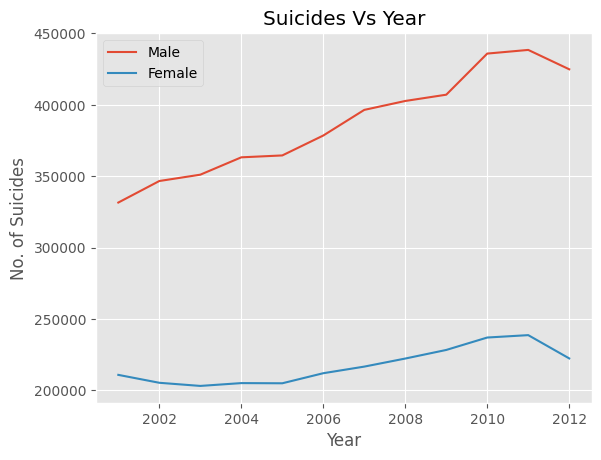

In [18]:
# creating a dataframe for males
male = df.query('Gender == "Male"')

# creating a dataframe for females
female = df.query('Gender == "Female"')

# plottng a graph for observing the variation with year
ax = male.groupby('Year')['Total'].sum().plot(title = 'Suicides Vs Year', label = 'Male')
ax = female.groupby('Year')['Total'].sum().plot(label = 'Female')
plt.xlabel('Year')
plt.ylabel('No. of Suicides')
plt.legend()
plt.show()

 Which age group is commiting most suicides?

In [19]:
df.Age_group.value_counts()

Age_group
15-29     24960
30-44     24064
45-59     19730
60+       13766
0-14       9639
0-100+     8951
Name: count, dtype: int64

The age group 0-100+ is not useful for analysis; let's remove it for better analysis.

In [20]:
# creating a new dataset which do not contain rows with age group 0-100+
age_group = df.query('Age_group != "0-100+"').copy()

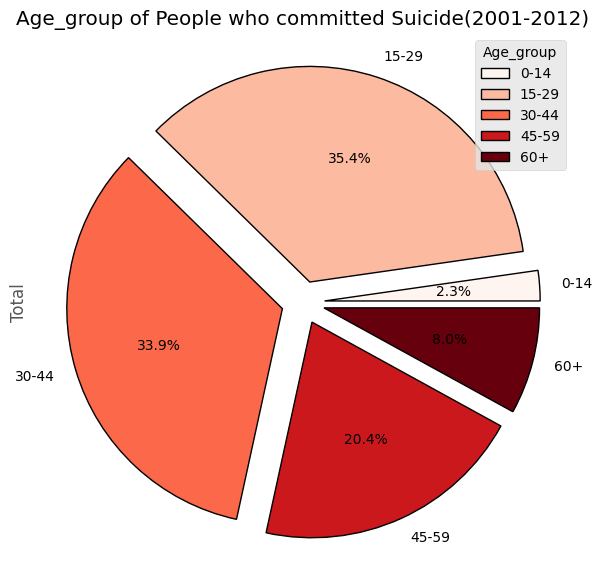

In [21]:
# plotting a pie chart for better visualization and understanding of the data.
ax = age_group.groupby('Age_group')['Total'].sum().plot.pie(y = 'Total',
                figsize=(7,7),
                autopct='%1.1f%%',
                cmap = 'Reds',
                title='Age_group of People who committed Suicide(2001-2012)',
                explode = (0.1,0.1,0.1,0.1,0.1),
                wedgeprops= {"edgecolor":"black",
                             'linewidth': 1,
                             'antialiased': True})
ax.legend(title='Age_group')
plt.show()

Causes of Suicide

In [22]:
#Making a new dataset named "causes" which only contains causes of the Suicide
causes = df.query('Type_code=="Causes"').copy().reset_index(drop = True)

# Since Type_code only contains causes so let's just remove it
causes = causes.drop(columns=['Type_code'], axis=1)
causes.head()

,State,Year,Type,Gender,Age_group,Total
0,A & N Islands,2001,Love Affairs,Female,0-14,1
1,A & N Islands,2001,Other Causes (Please Specity),Female,0-14,1
2,A & N Islands,2001,Other Prolonged Illness,Male,0-14,1
3,A & N Islands,2001,Failure in Examination,Male,0-14,1
4,A & N Islands,2001,Other Prolonged Illness,Female,15-29,8


In [23]:
causes.Type.value_counts()

Type
Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paral

In [24]:
#removing rows with unspecified causes
#also removing some discrepancies 
causes = causes.query('Type != ("Other Causes (Please Specity)","Causes Not known","Other Prolonged Illness","Not having Children (Barrenness/Impotency")')
print("Total no. of suicides caused due:\n",causes.groupby('Type')['Total'].sum())

Total no. of suicides caused due:
 Type
Bankruptcy or Sudden change in Economic            32755
Bankruptcy or Sudden change in Economic Status      2655
Cancellation/Non-Settlement of Marriage            11296
Cancer                                              9058
Death of Dear Person                               10321
Divorce                                             4133
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Failure in Examination                             27005
Fall in Social Reputation                          13464
Family Problems                                   341952
Ideological Causes/Hero Worshipping                 2118
Illegitimate Pregnancy                              2494
Illness (Aids/STD)                                  8723
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Not having Children(Barrenness/Impotency        

What are the major reasons for suicide?

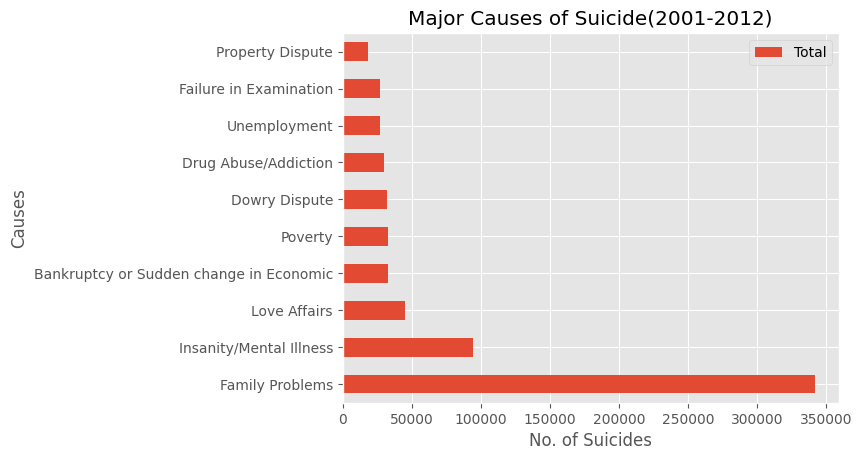

In [25]:
#plotting a bar graph for top 10 causes for suicide for better analysis
causes.groupby('Type')['Total'].sum().to_frame().sort_values('Total',ascending=False).head(10).plot(kind='barh',
                                                                                                    title='Major Causes of Suicide(2001-2012)')
plt.xlabel('No. of Suicides')
plt.ylabel('Causes')
plt.show()

Which states have maximum suicide?

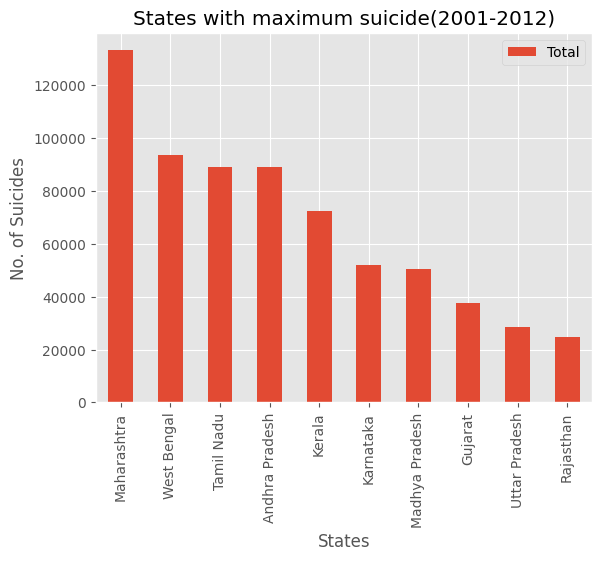

In [26]:
# plotting a bar graph for showing states with maximum no. of suicides
causes.groupby("State")["Total"].sum().to_frame().sort_values('Total',ascending=False).head(10).plot(kind='bar',
                                                                                                     title='States with maximum suicide(2001-2012)')
plt.ylabel('No. of Suicides')
plt.xlabel('States')
plt.show()

Professional Profiles

In [27]:
# creating a dataset that contains only prfessional profile of people who attempt suicide
professional_profile = df.query('Type_code == "Professional_Profile"').copy().reset_index(drop=True)

#since all rows have professional profile in type_code(that's why we do in last step) so, let's just remove that column
professional_profile = professional_profile.drop(columns=['Type_code'],axis=1)
professional_profile.head()

,State,Year,Type,Gender,Age_group,Total
0,A & N Islands,2001,Student,Female,0-14,2
1,A & N Islands,2001,Student,Male,0-14,1
2,A & N Islands,2001,Others (Please Specify),Male,0-14,1
3,A & N Islands,2001,House Wife,Female,15-29,21
4,A & N Islands,2001,Others (Please Specify),Female,15-29,1


In [28]:
professional_profile.Type.value_counts()

Type
Others (Please Specify)              5509
Unemployed                           2424
Farming/Agriculture Activity         2310
Service (Private)                    2230
Student                              1854
Self-employed (Business activity)    1793
Service (Government)                 1771
House Wife                           1543
Professional Activity                1513
Public Sector Undertaking            1506
Retired Person                        838
Name: count, dtype: int64

People of which profession commit most suicides?

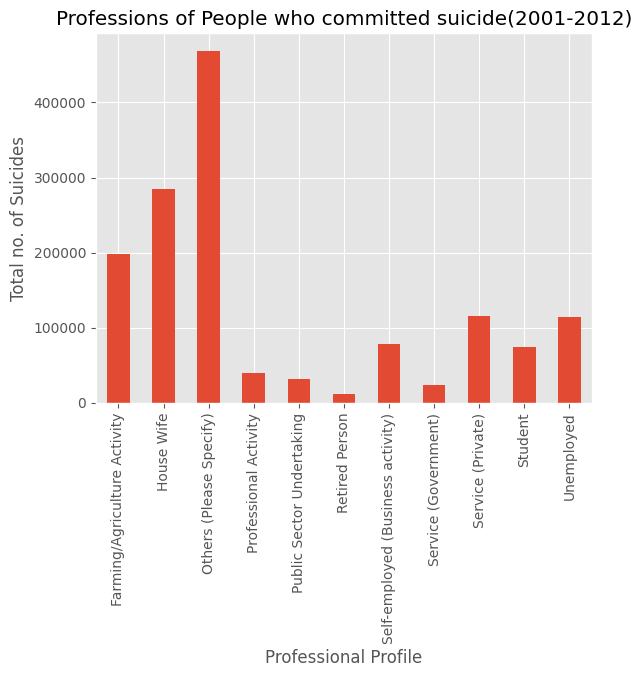

In [29]:
# plotting professional profiles of people who commit suicide
professional_profile.groupby('Type')['Total'].sum().plot(kind = 'bar',
                                                         title='Professions of People who committed suicide(2001-2012)')
plt.xlabel('Professional Profile')
plt.ylabel('Total no. of Suicides')
plt.show()

In [30]:
# creating a dataframe which consist only data of housewives
housewife = professional_profile.query('Type == "House Wife"').copy()
housewife.head()

,State,Year,Type,Gender,Age_group,Total
3,A & N Islands,2001,House Wife,Female,15-29,21
11,A & N Islands,2001,House Wife,Female,30-44,9
16,A & N Islands,2001,House Wife,Female,45-59,5
21,A & N Islands,2001,House Wife,Female,60+,3
29,A & N Islands,2002,House Wife,Female,15-29,22


In [31]:
# describing the data 
housewife.describe(include = 'object').T

,count,unique,top,freq
State,1543,35,Rajasthan,60
Type,1543,1,House Wife,1543
Gender,1543,1,Female,1543
Age_group,1543,5,15-29,388


What age group of housewives commits the highest number of suicides?

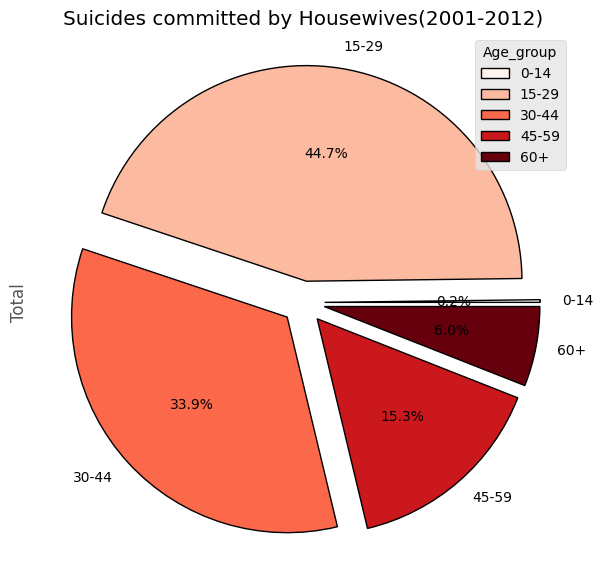

In [32]:
# plotting a pie chart for better understanding 
housewife.groupby('Age_group')['Total'].sum().plot.pie(y= 'Total',
                                                       figsize = (7,7),
                                                       autopct='%1.1f%%',
                                                       title = "Suicides committed by Housewives(2001-2012)",
                                                      cmap = 'Reds',
                                                      explode = (0.1,0.1,0.1,0.1,0.1),
                                                      wedgeprops= {"edgecolor":"black",
                                                                   'linewidth': 1,
                                                                   'antialiased': True})
plt.legend(title='Age_group')
plt.show()

Suicides among students

In [33]:
# creating a new dataset which contains information of students only
student = professional_profile.query('Type == "Student"').copy()
student.head()

,State,Year,Type,Gender,Age_group,Total
0,A & N Islands,2001,Student,Female,0-14,2
1,A & N Islands,2001,Student,Male,0-14,1
5,A & N Islands,2001,Student,Female,15-29,9
10,A & N Islands,2001,Student,Male,15-29,2
26,A & N Islands,2002,Student,Female,0-14,2


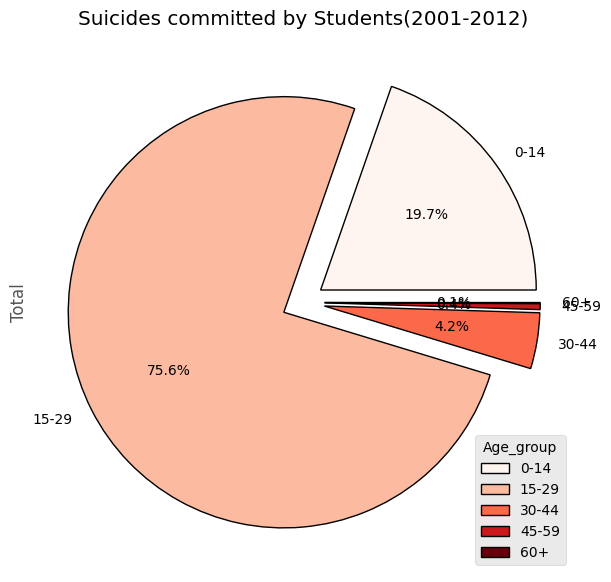

In [34]:
student.groupby('Age_group')['Total'].sum().plot.pie(y='Total',
                                                     figsize=(7,7),
                                                     autopct='%1.1f%%',
                                                     title='Suicides committed by Students(2001-2012)',
                                                     cmap = 'Reds',
                                                     explode = (0.1,0.1,0.1,0.1,0.1),
                                                     wedgeprops= {"edgecolor":"black",
                                                                  'linewidth': 1,
                                                                  'antialiased': True})
plt.legend(title='Age_group')
plt.show()

Increasing no. of suicides among Students over the years

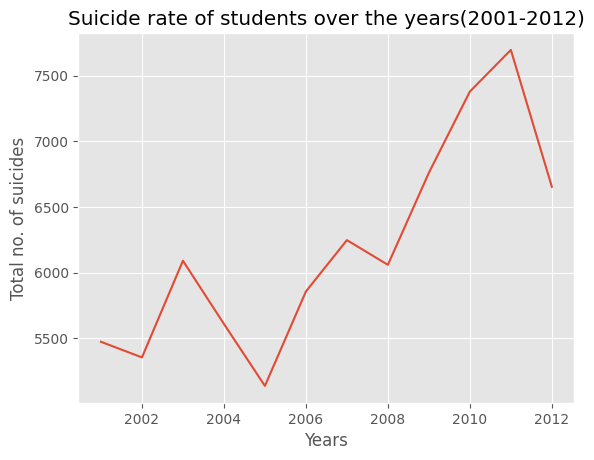

In [35]:
# plotting a line graph No. of suicides vs year
student.groupby('Year')['Total'].sum().plot(title='Suicide rate of students over the years(2001-2012)')
plt.xlabel('Years')
plt.ylabel('Total no. of suicides')
plt.show()